## Problem Statement:


The objective of this project is to develop a prediction model that can estimate the sales of products in BigMart stores based on various product and store characteristics. The dataset consists of sales information for 1559 products across 10 stores in different cities. By analyzing the features of the products and stores, the model aims to identify the key factors that influence sales and provide insights for improving overall sales performance.

The prediction model will enable BigMart to gain a better understanding of the specific attributes of products and stores that contribute to higher sales. This knowledge can help the company make informed decisions to optimize their product assortment, store layout, and marketing strategies, ultimately driving sales growth.



## Hypothesis Generation:

While analyzing the problem ,I thought about the following hypothesis 

Hypothesis1: Urban stores have higher sales compared to rural stores.

Hypothesis2: Increased product visibility correlates with higher sales.

Hypothesis3: Established brand names result in higher sales.

Hypothesis4: There is a positive correlation between store size and sales.

Hypothesis5: Higher-priced products exhibit lower sales quantity but potentially higher sales value.

Hypothesis6: Seasonal factors, particularly holidays, have a significant impact on sales.

#### Loading packages

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#### Loading the dataset









In [277]:
sales_data=pd.read_csv(r"C:\Users\LENOVO\Desktop\Mini_Project\Train.csv")

In [278]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [279]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [280]:
#number of data points & features
sales_data.shape

(8523, 12)

In [281]:
#checking for number of missing values in the dataframe
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### Categorical features :

- Item_Identifier

- Item_Fat_Content

- Item_Type

- Outlet_Identifier

- Outlet_Size

- Outlet_Location_Type

- Outlet_Type

In [282]:
#missing values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Handling the missing values 

- using the Mean for Item_Weight
- using the mode for Outlet_Size

In [283]:
#calculate Mean of "Item_Weight" column
sales_data["Item_Weight"].mean()

12.857645184136183

In [284]:
#filling the missing values in "Item_Weight" column with the Mean value

sales_data["Item_Weight"].fillna(sales_data["Item_Weight"].mean(),inplace=True)

In [285]:
#Testing 1
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [286]:
#determining the mode for "Outlet_Size" column


mode_of_outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode().iat[0])


In [287]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [288]:
missing_values=sales_data['Outlet_Size'].isnull()



In [289]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [290]:
sales_data.loc[missing_values,'Outlet_Size'] = sales_data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_of_outlet_size[x])

In [291]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [292]:
#Testing 2
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [293]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Numerical Features

In [294]:
sns.set()

<Figure size 432x432 with 0 Axes>

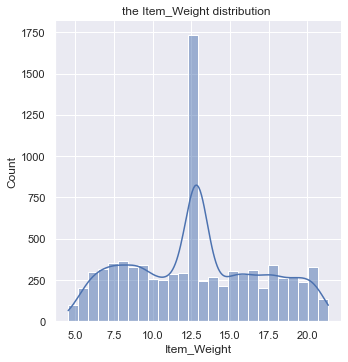

In [295]:
# the Item_Weight distribution 
plt.figure(figsize=(6,6))
sns.displot(sales_data["Item_Weight"] , kde=True)
plt.title("the Item_Weight distribution ")
plt.show()

<Figure size 432x432 with 0 Axes>

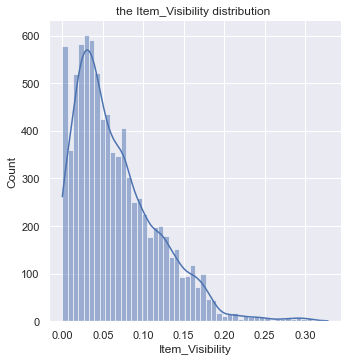

In [296]:
# the Item_Visibility distribution 
plt.figure(figsize=(6,6))
sns.displot(sales_data["Item_Visibility"] , kde=True)
plt.title("the Item_Visibility distribution ")
plt.show()

<Figure size 432x432 with 0 Axes>

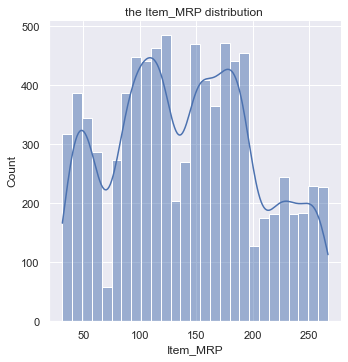

In [297]:
# the Item_MRP distribution 
plt.figure(figsize=(6,6))
sns.displot(sales_data["Item_MRP"] , kde=True)
plt.title("the Item_MRP distribution ")
plt.show()

<Figure size 432x432 with 0 Axes>

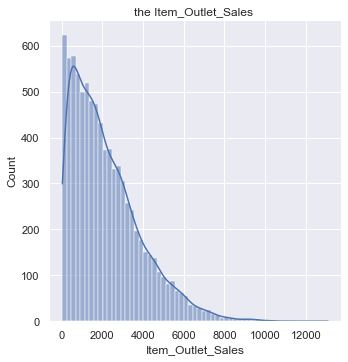

In [298]:
# theItem_Outlet_Sales distribution 
plt.figure(figsize=(6,6))
sns.displot(sales_data["Item_Outlet_Sales"] , kde=True)
plt.title("the Item_Outlet_Sales ")
plt.show()

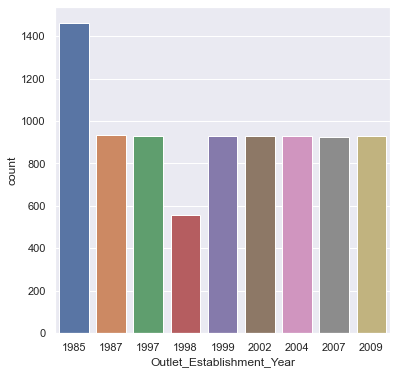

In [299]:
# the Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=sales_data)
plt.show()


#### Categorical features :

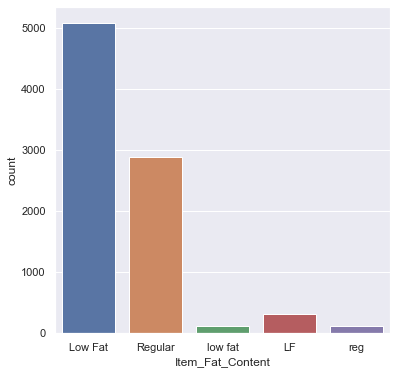

In [300]:
# the Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=sales_data)
plt.show()

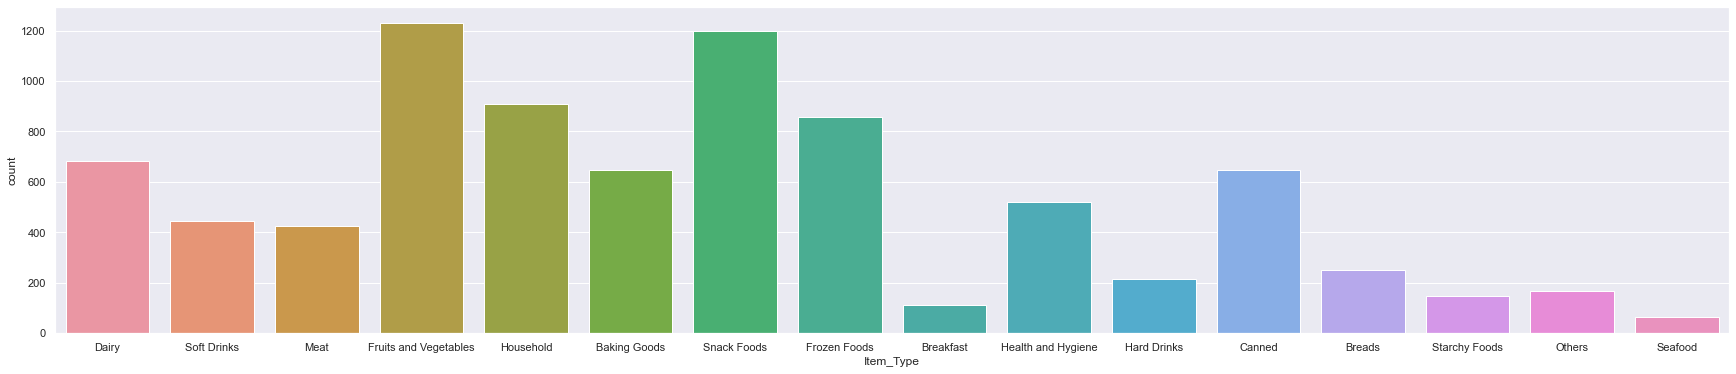

In [301]:
# the Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=sales_data)
plt.show()

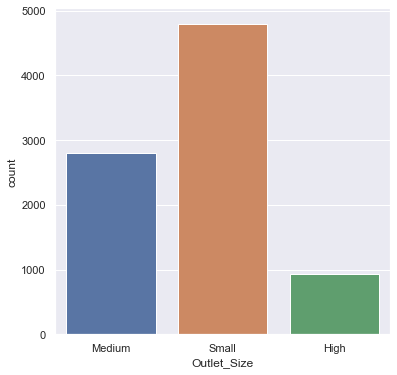

In [302]:
# the Outlet_Size column
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size',data=sales_data)
plt.show()

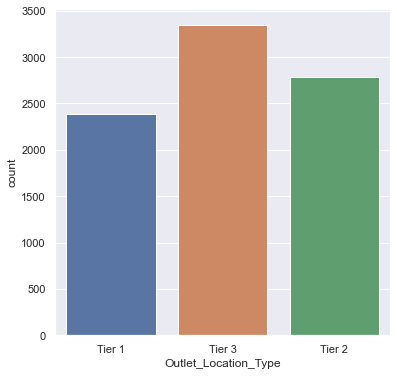

In [303]:
# the Outlet_Location_Type column
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Location_Type',data=sales_data)
plt.show()

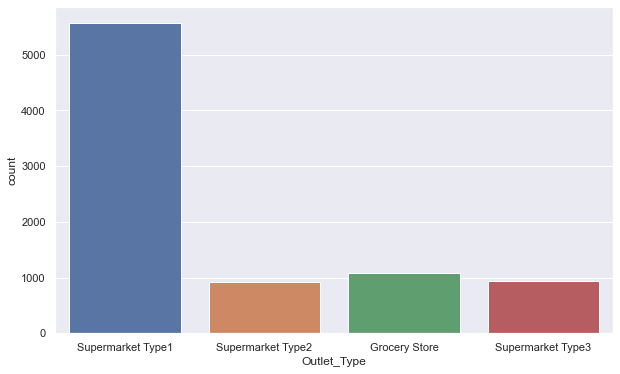

In [304]:

# the Outlet_Type column
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Type',data=sales_data)
plt.show()

In [305]:
type(sales_data)

pandas.core.frame.DataFrame

#### Data Pre-Processing

In [306]:
sales_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [307]:
sales_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)

In [308]:
sales_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Feature Engineering
It is wisely to add a new feature "Quantity_Sold_unit" hat holds the quantity sold per unit price, which can potentially improve the analysis or predictive performance of our model.

In [309]:
sales_data["Quantity_Sold_unit"]=(sales_data["Item_Outlet_Sales"]/sales_data["Item_MRP"])

sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity_Sold_unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868


#### Label Encoding

In [310]:
encoder = LabelEncoder()

In [311]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Quantity_Sold_unit         8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [312]:
sales_data['Item_Identifier']=encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content']=encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type']=encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier']=encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size']=encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type']=encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type']=encoder.fit_transform(sales_data['Outlet_Type'])



In [313]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity_Sold_unit
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14.951963
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,9.186454
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14.809346
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,4.021967
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,18.467868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,12.951520
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850,5.078589
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,14.016447
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,17.895281


#### Splitting Features and Target

In [314]:
X= sales_data.drop(columns='Item_Outlet_Sales', axis=1)

Y=sales_data['Item_Outlet_Sales']

X
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [315]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [316]:
X_test.shape ,X_test.shape, Y_train.shape, Y_test.shape

((1705, 12), (1705, 12), (6818,), (1705,))

In [344]:
X_train.iloc[0]

Item_Identifier              1102.000000
Item_Weight                     9.500000
Item_Fat_Content                1.000000
Item_Visibility                 0.035206
Item_Type                       6.000000
Item_MRP                      171.344800
Outlet_Identifier               9.000000
Outlet_Establishment_Year    1999.000000
Outlet_Size                     1.000000
Outlet_Location_Type            0.000000
Outlet_Type                     1.000000
Quantity_Sold_unit             13.926464
Name: 549, dtype: float64

In [346]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model_name', 'mse', 'rmse','mae' ,'r2'])
model_scores

,model_name,mse,rmse,mae,r2


#### Modeling

#### - Linear Regression

In [347]:
model = LinearRegression()



In [348]:
#Fitting the model to the training data
model.fit(X_train, Y_train)

LinearRegression()

In [349]:
# Predicting the target variable for the training data

Y_pred = model.predict(X_train)

In [351]:
# Evaluating model performance
mse = mean_squared_error(Y_train, Y_pred)
rmse = mean_squared_error(Y_train, Y_pred, squared=False)
mae = mean_absolute_error(Y_train, Y_pred)
r2 = r2_score(Y_train, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)





Mean Squared Error (MSE): 329366.98755702487
Root Mean Squared Error (RMSE): 573.9050335700366
Mean Absolute Error (MAE): 388.4860450479509
R-squared Score: 0.8886540250195529


In [352]:
Y_pred = model.predict(X_test)

In [356]:
# Evaluating model performance
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

model_name="LinearRegression"
model_scores.loc[0] = [model_name, mse, rmse,mae ,r2]

Mean Squared Error (MSE): 293051.0301409814
Root Mean Squared Error (RMSE): 541.3418791678521
Mean Absolute Error (MAE): 368.4758195180999
R-squared Score: 0.8921801848591491


#### - Regularized Linear Regression

In [357]:
# Creating an instance of the Lasso regression model
alp = 0.7  # Regularization parameter (adjust as needed)
model = Lasso(alpha=alp)

In [358]:
#fitting our model
model.fit(X_train,Y_train)

Lasso(alpha=0.7)

In [359]:
# Predicting the target variable for the training data

Y_pred = model.predict(X_test)

In [360]:
# Evaluating model performance
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

model_name="Regularized Linear Regression"
model_scores.loc[1] = [model_name, mse, rmse,mae ,r2]

Mean Squared Error (MSE): 293029.7771852872
Root Mean Squared Error (RMSE): 541.3222489287571
Mean Absolute Error (MAE): 368.03361384358504
R-squared Score: 0.8921880042814286


#### - RandomForest

In [328]:
# Creating an instance of the Random Forest regression model
n_estimators = 100  # Number of decision trees in the forest (adjust as needed)
model = RandomForestRegressor(n_estimators=n_estimators)

In [361]:
# Fitting the model to the training data
model.fit(X_train, Y_train)

# Predicting the target variable for the testing data
Y_pred = model.predict(X_test)

# Evaluating model performance on the testing set
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

model_name="RandomForest"
model_scores.loc[2] = [model_name, mse, rmse,mae ,r2]

Mean Squared Error (MSE): 293029.7771852872
Root Mean Squared Error (RMSE): 541.3222489287571
Mean Absolute Error (MAE): 368.03361384358504
R-squared Score: 0.8921880042814286


#### - XGBoost

In [362]:
import xgboost as xgb

In [363]:
# Creating an instance of the XGBoost regression model
model = xgb.XGBRegressor()

In [364]:
# Fitting the model to the training data
model.fit(X_train, Y_train)

# Predicting the target variable for the testing data
Y_pred = model.predict(X_test)

# Evaluating model performance on the testing set
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

model_name="XGBoost"
model_scores.loc[3] = [model_name, mse, rmse,mae ,r2]

Mean Squared Error (MSE): 4707.226007965477
Root Mean Squared Error (RMSE): 68.60922684279045
Mean Absolute Error (MAE): 38.641038010980594
R-squared Score: 0.9982681096948853


In [365]:
model_scores

,model_name,mse,rmse,mae,r2
0,LinearRegression,293051.030141,541.341879,368.475820,0.892180
1,Regularized Linear Regression,293029.777185,541.322249,368.033614,0.892188
2,RandomForest,293029.777185,541.322249,368.033614,0.892188
3,XGBoost,4707.226008,68.609227,38.641038,0.998268


This mini project aimed to build a predictive model for improving sales of 1559 products across 10 stores. We performed exploratory data analysis, handled missing values, engineered features, and encoded categorical variables. Different models were evaluated, with XGBoost showing the best performance in predicting sales and identifying factors for increased sales. This project underscores the importance of data analysis and predictive modeling for business success.